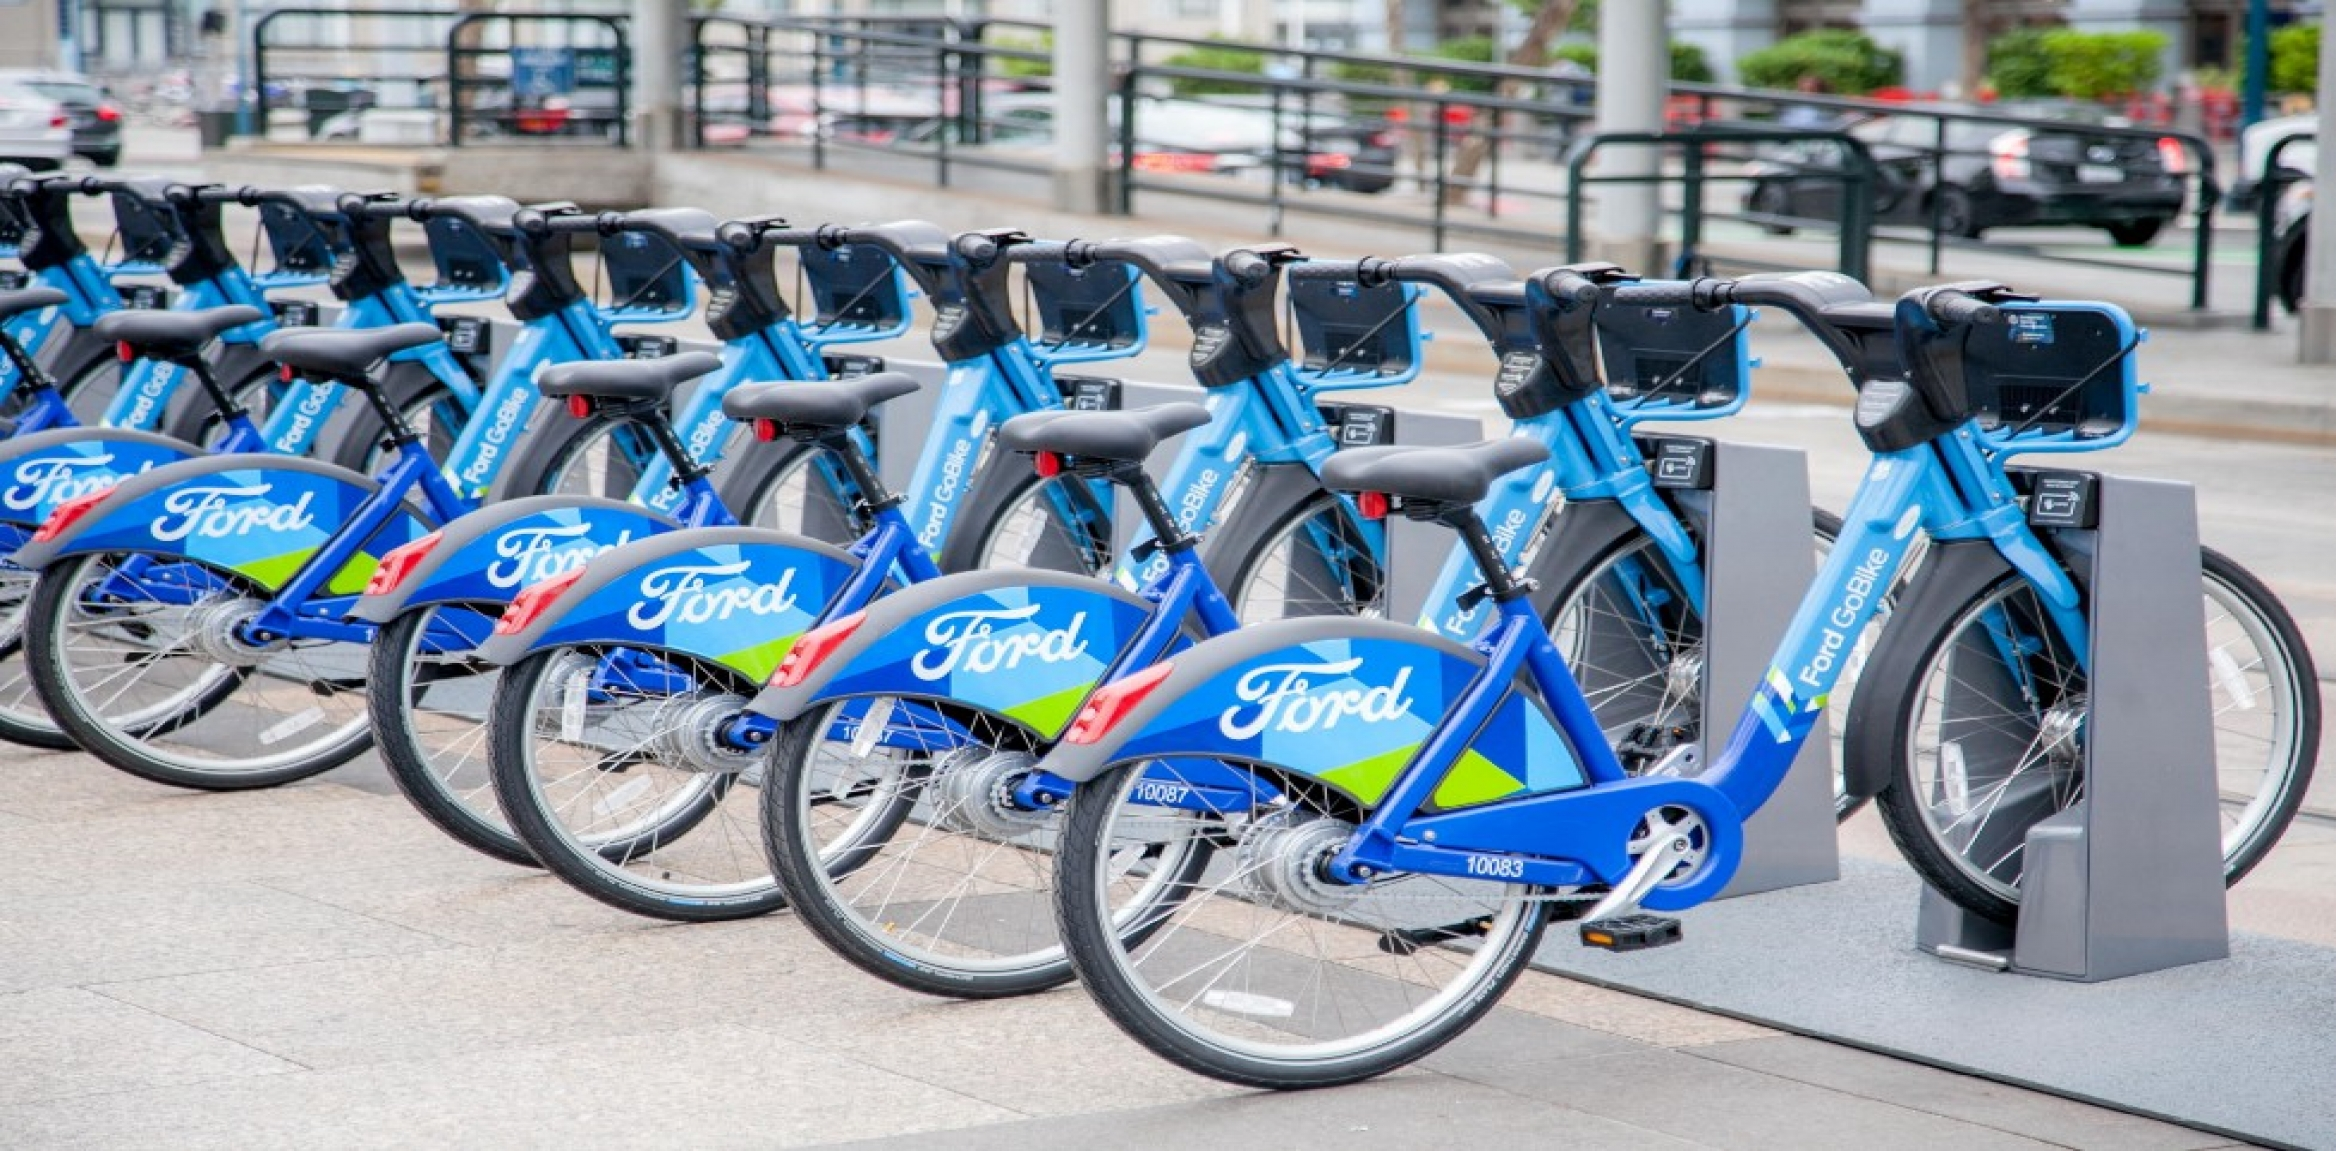
# Factors of Ford GO Bike Trip Frequency & Trip Duration
### by Keerthana Manoharan

## Investigation Overview

In this investigation, I wanted to look out how the features of **trips** and **users** could influence the **trip frequency & trip duration**. The main focus was on the features of user (age, gender, user type) and trip (trip start day & hour).

## Dataset Overview

The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area of the ford gobike for the year 2018. It has **18,63,721** ford gobike trip entries and **16** features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/ford_gobike_clean.csv', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  bool   
 16  start_day                int64  
 17  start_hour               int64  
 18  end_hour                 int64  
 19  age                      float64
dtypes: bool(1), float64(8), int64(5), object(6)
me

## Trip Frequency Vs Trip Duration

Trip duration in the dataset takes on a very large range of values, from about **61 seconds (251 trips)** at the lowest, to about **86,366 seconds (1 trip)** at the highest. Plotted on a logarithmic scale, the distribution of trip duration takes on a unimodal shape which is mostly concentrated on the spectrum width of 250 - 1500 seconds.

In [3]:
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]

from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 10,7

In [4]:
# describe duration_sec
df.duration_sec.value_counts().reset_index().sort_values(by='index')

,index,duration_sec
1369,61,251
1314,62,284
1100,63,458
1210,64,354
1284,65,303
...,...,...
12494,86142,1
13500,86205,1
14019,86208,1
12329,86281,1


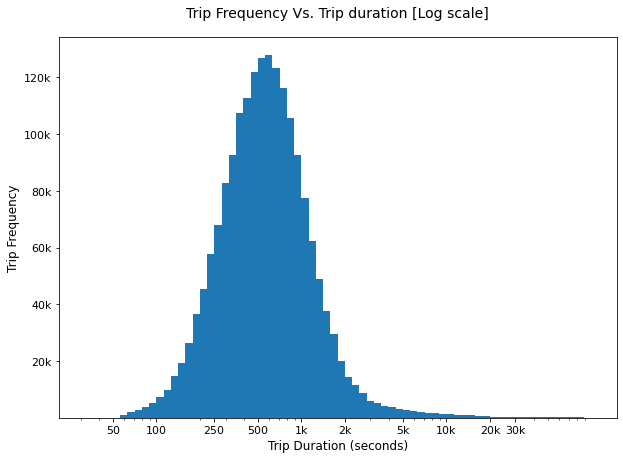

In [5]:
# set bins
log_binsize = 0.05
log_bins = 10 ** np.arange(1.5, 5 + log_binsize, log_binsize)

# Plot the distribution of duration_sec
plt.hist(data=df, x='duration_sec', bins=log_bins)

# log scale distribution
plt.xscale('log')

# set ticks locations
plt.xticks([50, 100, 250, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4], [50, 100, 250, 500, '1k', '2k', '5k', '10k', '20k', '30k'], fontsize=11)
plt.yticks([2e4, 4e4, 6e4, 8e4, 10e4, 12e4], ['20k', '40k', '60k', '80k', '100k', '120k'], fontsize=11)

# title and labels
plt.title('Trip Frequency Vs. Trip duration [Log scale]', pad =20, fontsize=14)
plt.xlabel('Trip Duration (seconds)', fontsize=12)
plt.ylabel('Trip Frequency', fontsize=12);

## Trip Frequency Vs. Day of the week

- **Weekdays** have more number of trips than **weekends**
- Especially, the trip count for mid three days of the week (Tue, Wed, Thurs) ranges between 320k and 314k

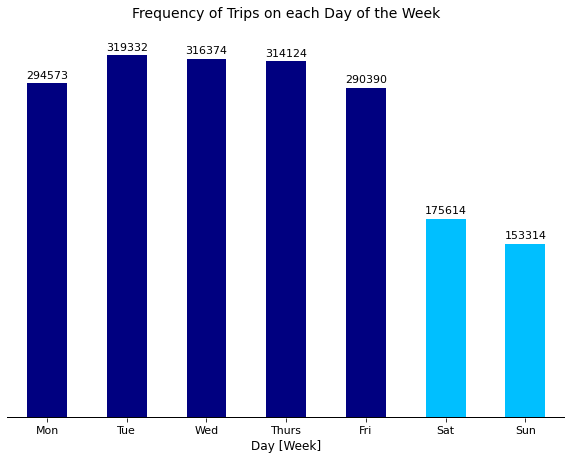

In [6]:
day_count = df.groupby('start_day').count().start_time

ax1 = plt.axes(frameon=False)
ax1.set_frame_on(False)

new_color = ['navy']*5 + ['deepskyblue']*2

# Plot the day distribution on bar
day_count.plot(kind='bar', color=new_color)

# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = day_count[loc]    

    # print the annotation just below the top of the bar
    plt.text(loc, count+5000, count, ha = 'center', color = 'black', fontsize=11)
    

# title and labels
plt.title('Frequency of Trips on each Day of the Week', pad =20, fontsize=14)

plt.xlabel('Day [Week]', fontsize=12);

labels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
plt.xticks(range(7), labels=labels, rotation=0, fontsize=11)

ax1.get_xaxis().tick_bottom()
ax1.axes.get_yaxis().set_visible(False)
xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2));

## Trip Frequency Vs. Hour of the Day

We can see that the peak hours are **8am - 9am** and **5pm - 6pm**

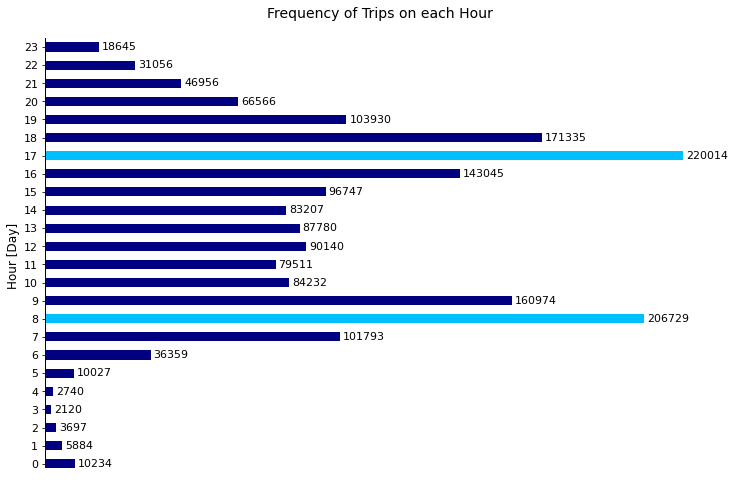

In [7]:
# set the figure size
plt.figure(figsize=(12,8))

ax1 = plt.axes(frameon=False)

# group by hour
hour_count = df.groupby('start_hour').count().start_time

# set colors
new_color = ['navy']*24
new_color[8] = 'deepskyblue'
new_color[17] = 'deepskyblue'

# Plot the day distribution on bar
hour_count.plot(kind='barh', color=new_color)
    
# get the current tick locations and labels
locs, labels = plt.xticks() 

# Logic to print the proportion text on the bars
for i in range (hour_count.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = hour_count[i]
    # Print the string value on the bar. 
    plt.text(count + 1000, i, count, va='center', fontsize=11)
    
# title and labels
plt.title('Frequency of Trips on each Hour', pad=20, fontsize=14);
plt.ylabel('Hour [Day]', fontsize=12);
plt.yticks(fontsize=11)

ax1.get_yaxis().tick_left()
ax1.axes.get_xaxis().set_visible(False)
xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(Line2D((ymin, ymin), (xmin, xmax), color='black', linewidth=2));

## Trip Frequency based on User Type & Gender

- We can see that the **Subscribers** uses the bike sharing system more frequently than **Customers**.
- Also, among them **Male** being the highest in frequency, followed by **Female, Users without personal information, Other**.

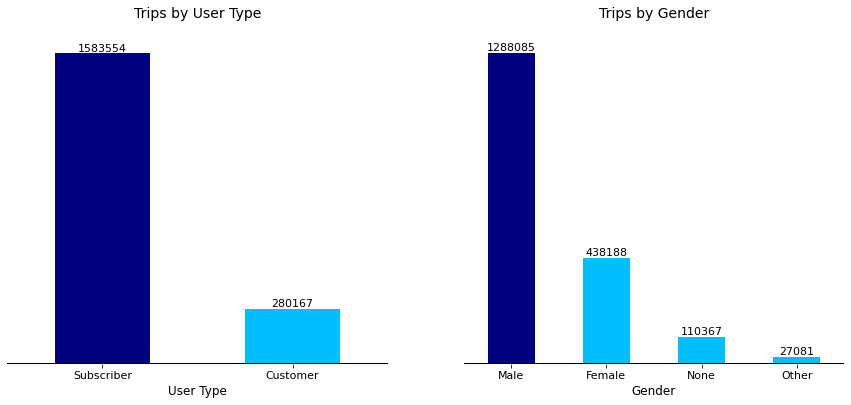

In [8]:
# set figure size
plt.figure(figsize=(15,6))

# Plot user_type on bar
plt1 = plt.subplot(1,2,1)
ax1 = plt1.axes
ax1.set_frame_on(False)

# calculating the type_counts
user_type_counts = df['user_type'].value_counts()

# Get the unique values of the `user_type` column, in the decreasing order of the frequency.
user_type_order = user_type_counts.index

user_type_counts.plot(kind='bar', color=['navy','deepskyblue'])

# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = user_type_counts[label.get_text()]    

    # print the annotation just below the top of the bar
    plt.text(loc, count+10000, count, ha = 'center', color = 'black', fontsize=11)


# title and labels
plt.title('Trips by User Type', pad=20, fontsize=14)
plt.xticks(rotation=360, fontsize=11)
plt.xlabel('User Type', fontsize=12);

ax1.get_xaxis().tick_bottom()
ax1.axes.get_yaxis().set_visible(False)
xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2));


# Plot user_type on bar
plt2 = plt.subplot(1,2,2)
ax2 = plt2.axes
ax2.set_frame_on(False)

# calculating the gender_counts
gender_counts = df['member_gender'].value_counts()

# Get the unique values of the `gender_type` column, in the decreasing order of the frequency.
gender_order = gender_counts.index

# Plot member_gender
gender_counts.plot(kind='bar', color=['navy','deepskyblue','deepskyblue','deepskyblue'])

# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = gender_counts[label.get_text()]    

    # print the annotation just below the top of the bar
    plt.text(loc, count+10000, count, ha = 'center', color = 'black', fontsize=11)


# title and labels
plt.title('Trips by Gender', pad=20, fontsize=14)
plt.xticks(rotation=360, fontsize=11)
plt.xlabel('Gender', fontsize=12);

ax2.get_xaxis().tick_bottom()
ax2.axes.get_yaxis().set_visible(False)
xmin, xmax = ax2.get_xaxis().get_view_interval()
ymin, ymax = ax2.get_yaxis().get_view_interval()
ax2.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2));

## Trip Frequency Vs. Trip Duration Vs. User Age

- It is seen that the high bike users are aged between **25 - 40**, having average trip duration around 500 seconds.
- The higher duration trips are performed almost uniformly by all age groups with low frequency.

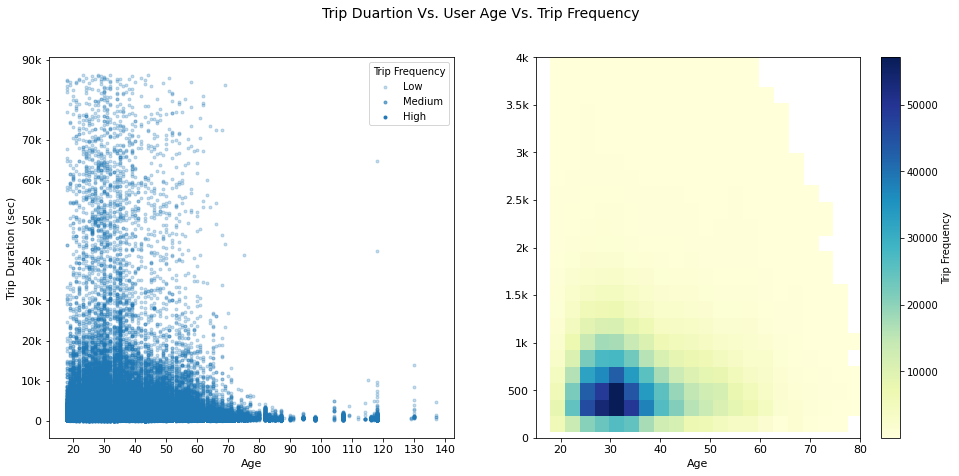

In [9]:
# set figure size
plt.figure(figsize=(16,7))

# Overall title
plt.suptitle('Trip Duartion Vs. User Age Vs. Trip Frequency', fontsize=14);
data = df.dropna()

plt.subplot(1,2,1)
# scatter plot between user age and trip duration
plt.scatter(data=data, x='age', y='duration_sec', alpha=0.25, marker='.');

# set ticks
plt.xticks(np.arange(0, df.age.max()+10, 10), fontsize=11)
plt.yticks(np.arange(0, df.duration_sec.max()+10000, 10000),[0,'10k','20k','30k','40k','50k','60k','70k','80k','90k'], fontsize=11)

# labels and title
plt.xlabel('Age', fontsize=11)
plt.ylabel('Trip Duration (sec)', fontsize=11)

# Plot non-displayed NaN line for legend
legend_1 = plt.scatter( np.NaN, np.NaN, color=base_color, marker = '.', alpha=0.6, label='Medium')
legend_1 = plt.scatter( np.NaN, np.NaN, color=base_color, marker = '.', alpha=1.0, label='High')
plt.legend(labels=['Low','Medium','High'], title='Trip Frequency')

# heat map
plt.subplot(1,2,2)
plt.hist2d(data=data, x='age', y='duration_sec', cmin=10, bins=[40,500],cmap='YlGnBu',linewidths=.5)
plt.colorbar(label = 'Trip Frequency')

# set ticks
plt.xticks(np.arange(20, 80+10, 10), fontsize=11)
plt.yticks(np.arange(0, 4000+500, 500), [0, 500,'1k','1.5k','2k','2.5k','3k','3.5k','4k'], fontsize=11)
plt.xlim(15,80)
plt.ylim(0,4000)

plt.xlabel('Age', fontsize=11);

## How is the frequency of trips on each Hour of each Day of the Week for the users aged 25~50?

- In **Busy hours (8am & 5pm)**, frequency of **Subscriber** trips is higher than **Customer** trips during morning, while in the evening frequency of **Customer** trips is almost equal to **Subscriber** trips in **Week Days**.
- The frequency of trips in **Week ends** is higher for **Customer** rather than **Subscriber** during day time (10am-5pm)

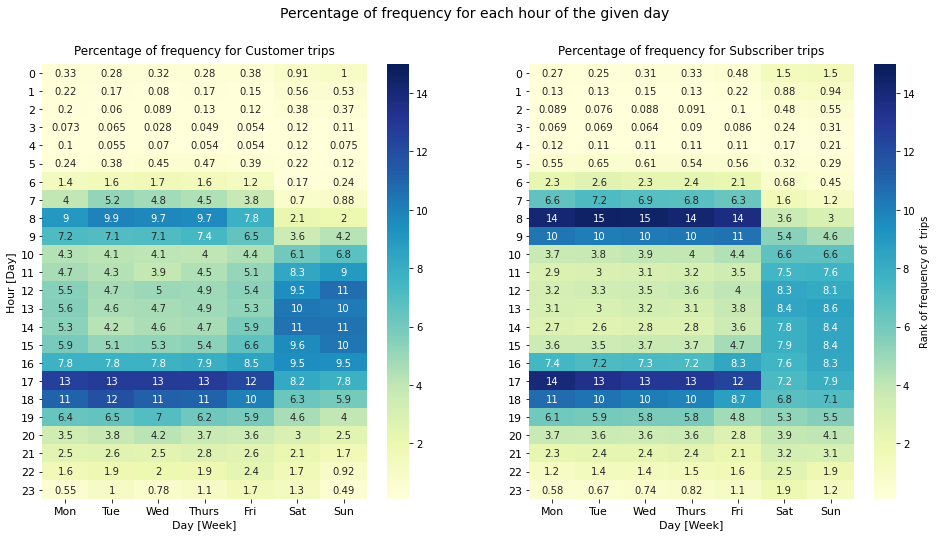

In [10]:
age_range = df[(df['age'] >=25) & (df['age'] <=50)]
user_grp = ((age_range.groupby(['user_type','start_day','start_hour']).count())).reset_index(['start_day','start_hour'])

# create pivot for customer
cust_pivot = user_grp.loc['Customer'].reset_index().pivot(index='start_hour', columns='start_day', values='duration_sec')

# create pivot for subscriber
subs_pivot = user_grp.loc['Subscriber'].reset_index().pivot(index='start_hour', columns='start_day', values='duration_sec')

# Percentage of frequency on each hour on the given day
cust_pivot = cust_pivot*100/cust_pivot.sum()
subs_pivot = subs_pivot*100/subs_pivot.sum()

# set figure size
plt.figure(figsize=(16,8))

# Overall title
plt.suptitle('Percentage of frequency for each hour of the given day', fontsize=14);

# heat map for customer
plt.subplot(1,2,1)
sns.heatmap(data=cust_pivot, cmap='YlGnBu', annot=True, annot_kws={"size": 10}, vmin=0.1 , vmax=15)

# set ticks
labels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
plt.xticks(np.arange(0.5,7.5,1), labels, fontsize=11)
plt.yticks(rotation=360, fontsize=11)

# label and title
plt.title('Percentage of frequency for Customer trips', pad=10, fontsize=12);
plt.xlabel('Day [Week]', fontsize=11)
plt.ylabel('Hour [Day]', fontsize=11)

# heat map for Subscriber
plt.subplot(1,2,2)
sns.heatmap(data=subs_pivot, cmap='YlGnBu', annot=True, annot_kws={"size": 10}, vmin=0.1 , vmax=15, cbar_kws={'label': 'Rank of frequency of  trips'})

# set ticks
plt.xticks(np.arange(0.5,7.5,1), labels, fontsize=11)
plt.yticks(rotation=360, fontsize=11)

# label and title
plt.title('Percentage of frequency for Subscriber trips', pad=10, fontsize=12);
plt.xlabel('Day [Week]', fontsize=11)
plt.ylabel('');

## Average Trip duration for Gender & User Type

- Eventhough, the **trip frequency** for Gender follows, 
> Male > Female > None(Users without personal data) > Other
- The overall order in **trip duration** is different as,
> None(Users without personal data) > Female > Other > Male

While according to **User Type**, trip duration order changes as,
- **Subscriber: Females** have the higher trip duration, followed by **Other, Users without personal data, Male**
- **Customer: Users without personal data** have the high trip duration, followed by **Female, Other, Male**
    
**Note:** The null values is replaced by 'None' indicated that there was no information about the user. This may be due to they have used the service for one time long trip.  

In [11]:
# group by member_gender and user_type by mean
gender_user = df.groupby(['member_gender','user_type']).mean().duration_sec.reset_index()

# create pivot of group by in previous step
gender_user_pivot = gender_user.pivot(index='member_gender', columns='user_type', values='duration_sec')

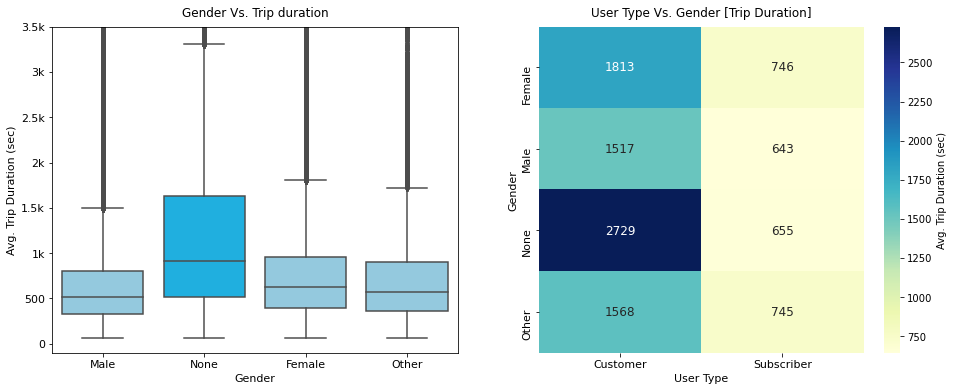

In [12]:
plt.figure(figsize=(16,6))

# Plot gender on box
plt.subplot(1,2,1)

# box plot between gender and trip duration
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', palette=['skyblue','deepskyblue','skyblue','skyblue']);

# set ticks
plt.yticks(np.arange(0, 3500+1, 500),[0,500,'1k','1.5k','2k','2.5k','3k','3.5k'], fontsize=11)
plt.xticks(fontsize=11)
# set y limit
plt.ylim(-100,3500)

# labels and title
plt.xlabel('Gender', fontsize=11)
plt.ylabel('Avg. Trip Duration (sec)', fontsize=11)
plt.title('Gender Vs. Trip duration', pad=10, fontsize=12);


# Heat Map Gender and User Type
plt.subplot(1,2,2)

sns.heatmap(gender_user_pivot, annot = True, annot_kws={"size": 12}, fmt = '.0f', cmap='YlGnBu', cbar_kws={'label': 'Avg. Trip Duration (sec)'})

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# labels and title
plt.xlabel('User Type', fontsize=11)
plt.ylabel('Gender', fontsize=11)
plt.title('User Type Vs. Gender [Trip Duration]', pad=10, fontsize=12);

## Average Trip duration for Day[Week] & User Type

- Eventhough the number of trips are greater for **weekdays**, the duration in seconds is greater for **weekends**.
- It is also evident that **Customer** have the higher Trip duration than **Subscriber**, eventhough frequent trips is contributed by **Subscriber**.
- We can see that in both **Customer** and **Subscriber**, **weekends** have the higher trip duration, among which **Customer** has the highest. 

In [13]:
# group by trip day and user_type by mean
day_user = df.groupby(['start_day','user_type']).mean().duration_sec.reset_index()

# create pivot of group by in previous step
day_user_pivot = day_user.pivot(index='start_day', columns='user_type', values='duration_sec')

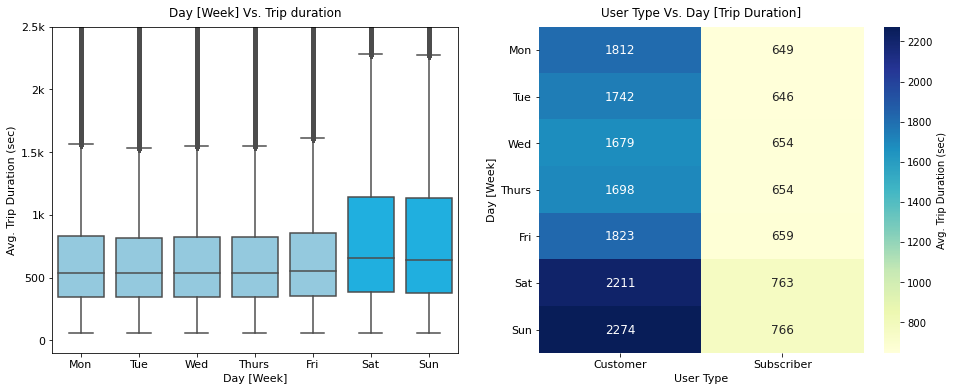

In [14]:
plt.figure(figsize=(16,6))

# Plot day on box
plt.subplot(1,2,1)

# set color
new_color = ['skyblue']*5 + ['deepskyblue']*2

# box plot between Day and trip duration
sns.boxplot(data = df, x = 'start_day', y = 'duration_sec', palette=new_color);

# set ticks
plt.yticks(np.arange(0, 3000+1, 500),[0,500,'1k','1.5k','2k','2.5k','3k'], fontsize=11)
# set ticks
labels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
plt.xticks(range(7), labels=labels, rotation=0, fontsize=11)
# set y limit
plt.ylim(-100,2500)

# labels and title
plt.xlabel('Day [Week]', fontsize=11)
plt.ylabel('Avg. Trip Duration (sec)', fontsize=11)
plt.title('Day [Week] Vs. Trip duration', pad=10, fontsize=12);


# Heat Map Day and User Type
plt.subplot(1,2,2)

sns.heatmap(day_user_pivot, annot = True, annot_kws={"size": 12}, fmt = '.0f', cmap='YlGnBu', cbar_kws={'label': 'Avg. Trip Duration (sec)'})

plt.xticks(fontsize=11)
labels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
plt.yticks(np.arange(0.5, 7.5, 1), labels=labels, rotation=0, fontsize=11)

# labels and title
plt.xlabel('User Type', fontsize=11)
plt.ylabel('Day [Week]', fontsize=11)
plt.title('User Type Vs. Day [Trip Duration]', pad=10, fontsize=12);

In [15]:
# group by trip day, user type and gender by mean
day_gender = df.groupby(['start_day','member_gender','user_type']).mean().duration_sec.reset_index()

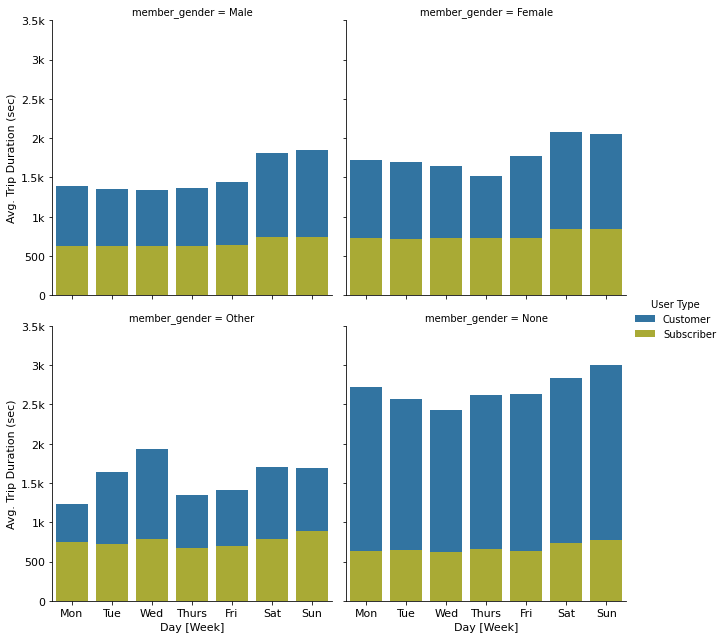

In [16]:
# create color
color = [sns.color_palette()[0],sns.color_palette()[8]]
# create facet grid
g = sns.FacetGrid(data=day_gender, col='member_gender', col_wrap=2, hue='user_type', col_order = ['Male','Female','Other','None'], palette=color, height=4.5)
g.map(sns.barplot, 'start_day', 'duration_sec', order=range(7))
g.set_axis_labels("Day [Week]", "Avg. Trip Duration (sec)", fontsize=11)
g.add_legend(title='User Type')
labels = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
g.set_xticklabels(labels, rotation=0, fontsize=11)
g.set_yticklabels([0,500,'1k','1.5k','2k','2.5k','3k','3.5k'], fontsize=11);

## Users of which age, contribute high trip duration ?

We have seen that the high bike users are aged between **25 - 40**, having average trip duration around 500 seconds. Then users of which age, contributed higher trip duration ?

- Early morning around **1am-4am**, user aged **60** goes for **high duration trips**.
- While, few elder users aged above **100** go for higher duration trips during **day time (5am-5pm)**.

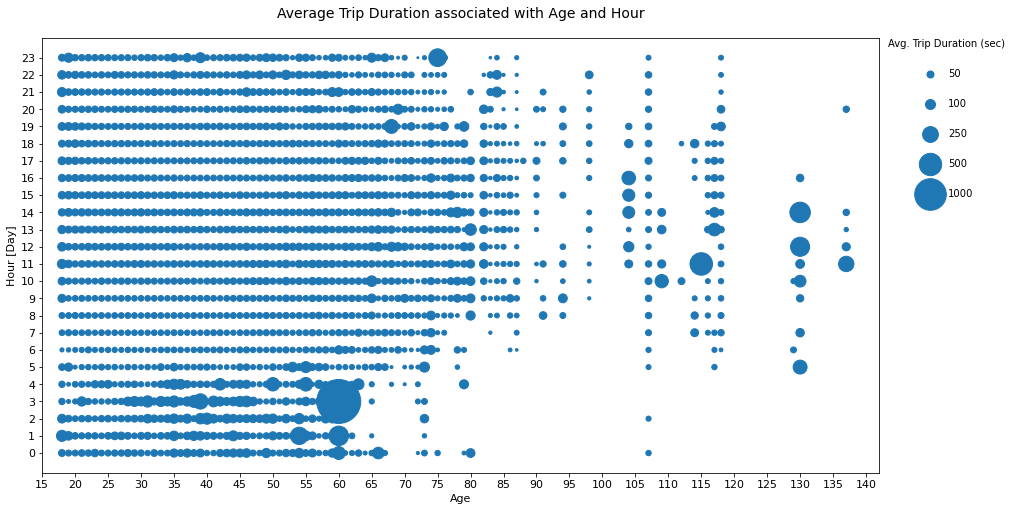

In [17]:
# set the figure size
plt.figure(figsize=(15,8))

# Group by age and hour
age_hour = df.groupby(['age','start_hour']).mean().duration_sec.reset_index()

# plot 
plt.scatter(data = age_hour, x='age', y='start_hour', s=age_hour['duration_sec']/20)

# set ticks
plt.xticks(np.arange(15, age_hour.age.max()+5, 5), fontsize=11)
plt.yticks(range(24), fontsize=11)
plt.xlim(15, age_hour.age.max()+5)

# labels and title
plt.title('Average Trip Duration associated with Age and Hour', pad=20, fontsize=14)
plt.xlabel('Age', fontsize=11)
plt.ylabel('Hour [Day]', fontsize=11)

# dummy series for adding legend
sizes = [50, 100, 250, 500, 1000]
base_color = sns.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes, loc='upper left',labelspacing=2, frameon=False, bbox_to_anchor=(1, 1.02), title='Avg. Trip Duration (sec)');

## Top 20 Busiest Route

The Busiest Route is from **San Francisco Ferry Building (Harry Bridges Plaza)** (ID:15) to **The Embarcadero at Sansome St** (ID:6) with trip count of **7585**

In [18]:
# start station name
df[df.start_station_id == 15].start_station_name[1]

'San Francisco Ferry Building (Harry Bridges Plaza)'

In [19]:
# end station name
df[df.end_station_id == 6].end_station_name[30]

'The Embarcadero at Sansome St'

In [20]:
# convert the data type of start_station_id, end_station_id from float64 to int.
df.start_station_id = df.start_station_id.astype('Int64')
df.end_station_id = df.end_station_id.astype('Int64')

# busiest route
busiest_route = df[['start_station_id','end_station_id']].dropna().value_counts().nlargest(20).unstack()

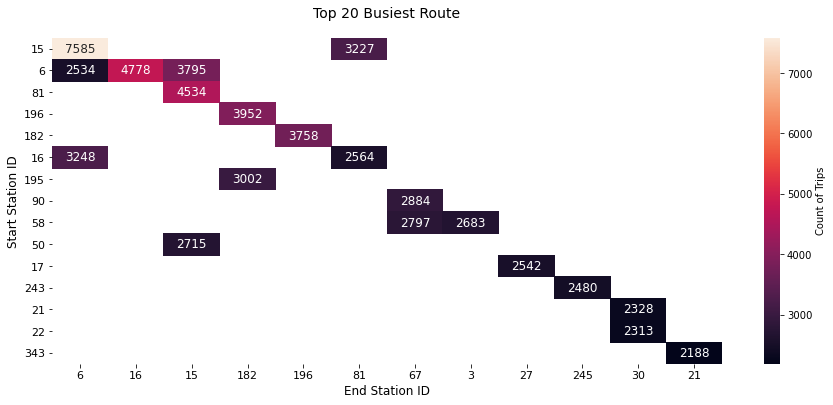

In [21]:
# set figure size
plt.figure(figsize=(15,6))

# heat map
sns.heatmap(data=busiest_route, annot = True, annot_kws={"size": 12}, fmt = '.0f', cmap='rocket', cbar_kws={'label': 'Count of Trips'})

# set ticks
plt.xticks(rotation=360, fontsize=11)
plt.yticks(rotation=360, fontsize=11)

# label and title
plt.title('Top 20 Busiest Route', pad=20, fontsize=14)
plt.ylabel('Start Station ID', fontsize=12)
plt.xlabel('End Station ID', fontsize=12);